In [2]:
# taken from https://www.youtube.com/watch?v=VMj-3S1tku0&t=455s
# The spelled-out intro to neural networks and backpropagation: building micrograd

import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
def f(x):
    return x * x - 3 * x + 1

In [12]:
f(2)

-1

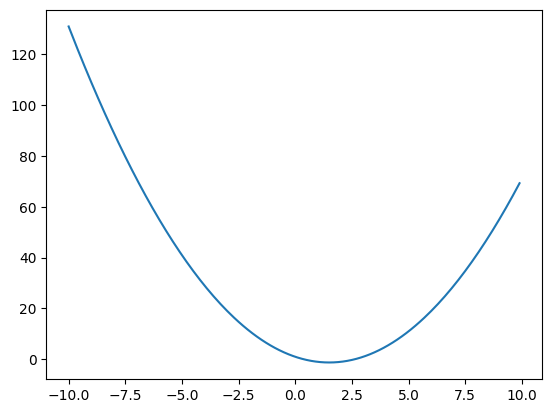

In [11]:
xs = np.arange(-10, 10, 0.1)
ys = f(xs)
plt.plot(xs, ys)

Derivative: How does the function change when we change the input?

In [14]:
h = 0.001
x= 3.0
f(x + h)
(f(x + h) - f(x)) / h

3.0009999999993653

Same can be applied for a function with multiple variables.

You need the local derivative of each node in the graph. Thats all it needs due to the chain rule.

In [18]:
h = 0.0001
a = 3.0
b = -2.0
c  = 5.0
d = a*b+c
a+=h
d2 = a*b+c
print(d)
print(d2)
print((d2-d)/h)


-1.0
-1.0002000000000004
-2.0000000000042206


In [32]:
from graphviz import Digraph

def trace(root):
  # builds a set of all nodes and edges in a graph
  nodes, edges = set(), set()
  def build(v):
    if v not in nodes:
      nodes.add(v)
      for child in v._prev:
        edges.add((child, v))
        build(child)
  build(root)
  return nodes, edges

def draw_dot(root):
  dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'}) # LR = left to right
  
  nodes, edges = trace(root)
  for n in nodes:
    uid = str(id(n))
    # for any value in the graph, create a rectangular ('record') node for it
    dot.node(name = uid, label = "{ %s | data %.4f | grad %.4f }" % (n.label, n.data, n.grad), shape='record')
    if n._op:
      # if this value is a result of some operation, create an op node for it
      dot.node(name = uid + n._op, label = n._op)
      # and connect this node to it
      dot.edge(uid + n._op, uid)

  for n1, n2 in edges:
    # connect n1 to the op node of n2
    dot.edge(str(id(n1)), str(id(n2)) + n2._op)

  return dot

In [39]:
class Value:
    def __init__(self, data, _children=None, _op="", label=""):
        self.data = data
        self.grad = 0.0
        
        if _children is None:
            _children = tuple()
        self._prev = set(_children)
        self._op=_op
        self.label = label
    def __repr__(self) -> str:
        return f"Value({self.data})"
    
    def __add__(self, other):
        return Value(self.data + other.data, (self, other), "+")
    
    def __mul__(self, other):
        return Value(self.data * other.data, (self, other), "*")
    
a = Value(3.0, label="a")
b = Value(-2.0, label="b")
c = Value(5.0, label="c")

d = a*b + c


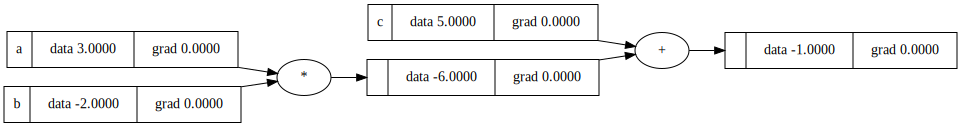

In [40]:
draw_dot(d)